In [1]:
import pandas as pd 
import numpy as np 


In [2]:
sal_train=pd.read_csv('SalaryData_Train.csv')

In [3]:
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
sal_test=pd.read_csv('SalaryData_Test.csv')

In [17]:
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [25]:
sal_train['occupation']=np.log10(sal_train['Salary']+1)

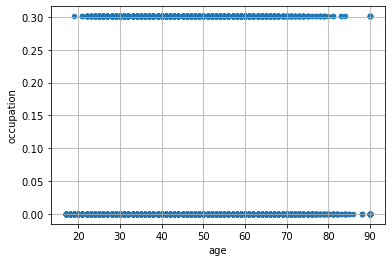

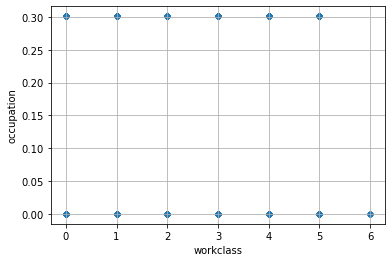

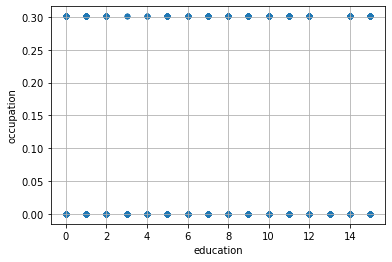

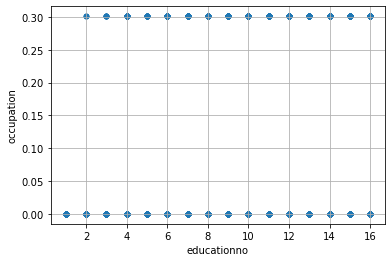

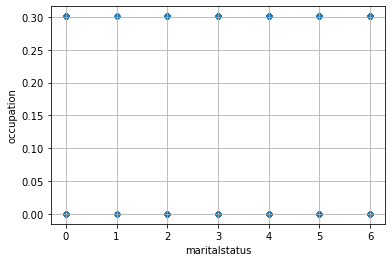

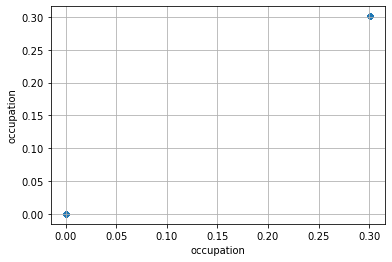

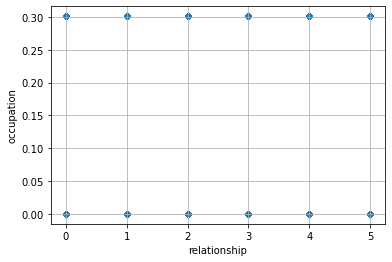

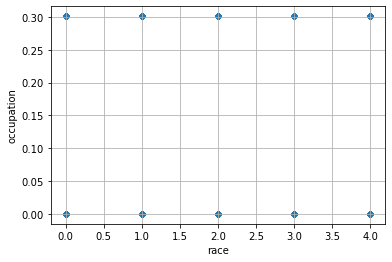

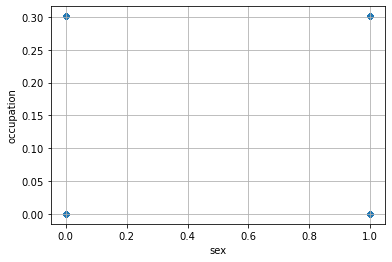

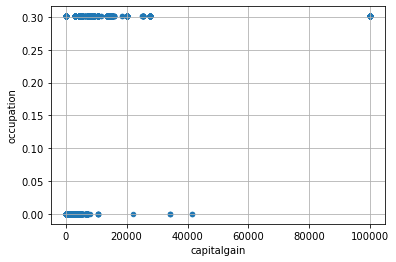

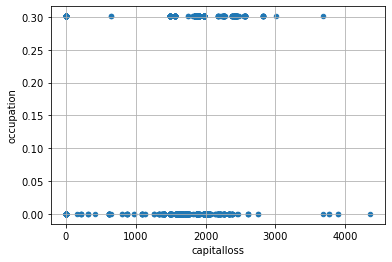

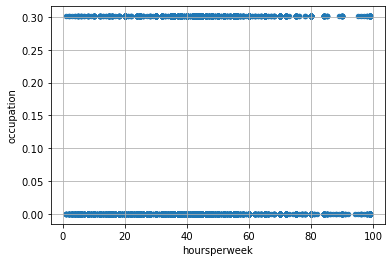

In [26]:
for i in sal_train.describe().columns[:-2]:
    sal_train.plot.scatter(i,'occupation',grid=True)

<AxesSubplot:title={'center':'Salary'}, xlabel='age'>

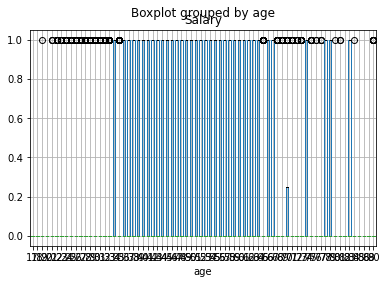

In [28]:
sal_train.boxplot(column='Salary',by='age')

<AxesSubplot:title={'center':'education'}, xlabel='Salary'>

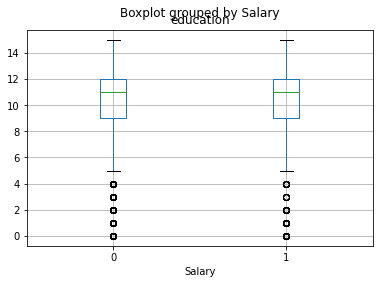

In [31]:
sal_train.boxplot(column='education',by='Salary')

In [5]:
sal_train['workclass']=sal_train['workclass'].astype('category')
sal_train['education']=sal_train['education'].astype('category')
sal_train['maritalstatus']=sal_train['maritalstatus'].astype('category')
sal_train['occupation']=sal_train['occupation'].astype('category')
sal_train['relationship']=sal_train['relationship'].astype('category')
sal_train['race']=sal_train['race'].astype('category')
sal_train['native']=sal_train['native'].astype('category')
sal_train['sex']=sal_train['sex'].astype('category')

In [6]:
sal_train.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [7]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [8]:
sal_train['Salary'] = label_encoder.fit_transform(sal_train['Salary'])

In [9]:
sal_train.Salary

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [10]:
sal_train['workclass'] = label_encoder.fit_transform(sal_train['workclass'])
sal_train['education'] = label_encoder.fit_transform(sal_train['education'])
sal_train['maritalstatus'] = label_encoder.fit_transform(sal_train['maritalstatus'])
sal_train['occupation'] = label_encoder.fit_transform(sal_train['occupation'])
sal_train['relationship'] = label_encoder.fit_transform(sal_train['relationship'])
sal_train['race'] = label_encoder.fit_transform(sal_train['race'])
sal_train['sex'] = label_encoder.fit_transform(sal_train['sex'])
sal_train['native'] = label_encoder.fit_transform(sal_train['native'])

In [11]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [12]:
X = sal_train.iloc[:,0:13]
Y = sal_train.iloc[:,13]

In [13]:
sal_train.Salary.unique()

array([0, 1])

In [14]:
sal_train.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21112, 13), (21112,), (9049, 13), (9049,))

In [20]:
clf=SVC()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 80.00884075588462


array([[6600,  185],
       [1624,  640]], dtype=int64)

In [21]:
y_pred=clf.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

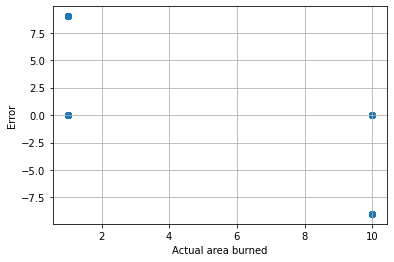

In [35]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(y_pred)-10**(y_test))

(array([1624.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 7240.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  185.]),
 array([-9.  , -8.64, -8.28, -7.92, -7.56, -7.2 , -6.84, -6.48, -6.12,
        -5.76, -5.4 , -5.04, -4.68, -4.32, -3.96, -3.6 , -3.24, -2.88,
        -2.52, -2.16, -1.8 , -1.44, -1.08, -0.72, -0.36,  0.  ,  0.36,
         0.72,  1.08,  1.44,  1.8 ,  2.16,  2.52,  2.88,  3.24,  3.6 ,
         3.96,  4.32,  4.68,  5.04,  5.4 ,  5.76,  6.12,  6.48,  6.84,
         7.2 ,  7.56,  7.92,  8.28,  8.64,  9.  ]),
 <BarContainer object of 50 artists>)

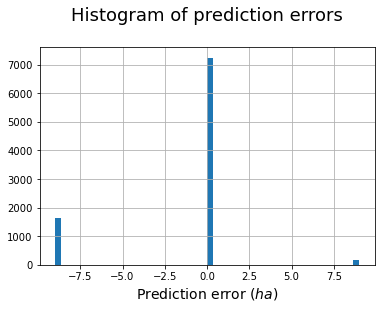

In [37]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(y_pred.reshape(y_pred.size,))-10**(y_test),bins=50)